In [1]:
#NEW ATTEMPT Below 

In [2]:
#Load data
import pandas as pd
df = pd.read_csv('../Data/df_apr_pre.csv')
df

,id_str,created_at,full_text,lang,in_reply_to_status_id_str,in_reply_to_user_id,entities.hashtags,entities.media,entities.symbols,entities.urls,...,user.location,user.name,user.screen_name,user.profile_banner_url,user.profile_image_url,user.statuses_count,user.url,user.verified,Johnny Depp sentiment,Amber Heard sentiment
0,1510206814692036608,2022-04-02 10:45:37+00:00,"@BBCWorld Hey, if Amber Heard can still have a...",en,1.510186e+18,7.421430e+05,[],NaN,[],[],...,"Wilkes-Barre, PA",Marquis Morris,MarquisSinger,https://pbs.twimg.com/profile_banners/30817133...,http://pbs.twimg.com/profile_images/1519004063...,1332.0,NaN,False,negative,negative
1,1510204553186140164,2022-04-02 10:36:38+00:00,Is it really the face of a traumatized and ter...,en,NaN,NaN,"[{'indices': [78, 99], 'text': 'JusticeForJohn...",NaN,[],[],...,France,Dark Selene🌌🌜,DarkSelene3,https://pbs.twimg.com/profile_banners/33509504...,http://pbs.twimg.com/profile_images/1456348075...,149915.0,NaN,False,not mentioned,not mentioned
2,1510204149094404099,2022-04-02 10:35:02+00:00,"Mmh the ""victim"" telling the ""abuser"": stop ru...",en,NaN,NaN,"[{'indices': [60, 93], 'text': 'JusticeForJohn...",NaN,[],[],...,France,Nor33 🇫🇷,Angiex0101,https://pbs.twimg.com/profile_banners/6323772/...,http://pbs.twimg.com/profile_images/1384567498...,36946.0,NaN,False,not mentioned,not mentioned
3,1510203910971326464,2022-04-02 10:34:05+00:00,"@milko976 Hi, I would like the Justice for Joh...",en,1.509854e+18,1.227922e+18,"[{'indices': [71, 92], 'text': 'JusticeForJohn...",NaN,[],[],...,NaN,Aeris4Ever,sxxx_exol,https://pbs.twimg.com/profile_banners/21863351...,http://pbs.twimg.com/profile_images/1510215916...,124.0,NaN,False,not mentioned,not mentioned
4,1510202907970445326,2022-04-02 10:30:06+00:00,Loved this #JusticeForJohnnyDeppVirginia2022 #...,en,NaN,NaN,"[{'indices': [11, 44], 'text': 'JusticeForJohn...",NaN,[],"[{'display_url': 'youtu.be/CphiwOE-mL8', 'indi...",...,manchester,Zeinah Bray,bray_zeinah,NaN,http://pbs.twimg.com/profile_images/1419414897...,4580.0,NaN,False,not mentioned,not mentioned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15111,1510857771671076868,2022-04-04 05:52:17+00:00,@AdrianaInBloom *cough* Amber Heard *cough*,en,1.510420e+18,4.193062e+08,[],NaN,[],[],...,where the pi-Smite is,Pie-nitent One,EatingApplePie1,https://pbs.twimg.com/profile_banners/10443380...,http://pbs.twimg.com/profile_images/1483556671...,3774.0,NaN,False,not mentioned,neutral
15112,1510855684820291587,2022-04-04 05:44:00+00:00,"Safe to say, those particular people are NOT o...",en,1.510856e+18,1.410871e+18,"[{'indices': [86, 107], 'text': 'JusticeforJoh...",NaN,[],[],...,"London, England",JusticeforJohnnyDepp✊🏻 (Soph),JDepp94,https://pbs.twimg.com/profile_banners/14108706...,http://pbs.twimg.com/profile_images/1502943790...,3987.0,NaN,False,not mentioned,not mentioned
15113,1510855648535322625,2022-04-04 05:43:51+00:00,But amber Heard and Ezra miller are sooo much ...,en,NaN,NaN,[],NaN,[],[],...,she/her,كلي خرة,by3_I_l3ft,https://pbs.twimg.com/profile_banners/14864697...,http://pbs.twimg.com/profile_images/1517396386...,1114.0,NaN,False,not mentioned,positive
15114,1510855084028137472,2022-04-04 05:41:37+00:00,@orenatopaixao Amber heard has been arrested f...,en,1.510644e+18,2.705713e+08,[],NaN,[],[],...,NaN,Sibilla,Sibilla08726941,NaN,http://abs.twimg.com/sticky/default_profile_im...,847.0,NaN,False,not mentioned,negative


In [3]:
import spacy
from spacy import tokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords
import re
import nltk
from nltk.corpus import wordnet
from nltk.stem.porter import PorterStemmer

# Load the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Load spacy object
nlp = spacy.load('en_core_web_sm')

# Preprocess the tweets
stop_words = set(stopwords.words('english'))

def clean_tweet(tweet):
    if type(tweet) == float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = re.sub("amber","", temp)
    temp = re.sub("amp","", temp)
    temp = re.sub("heard","", temp)
    temp = re.sub("johnny","", temp)
    temp = re.sub("depp","", temp)
    temp = re.sub("ah","", temp)
    temp = re.sub("jd","", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stop_words]
    temp = " ".join(word for word in temp)
    return temp

def tokenize(tweet):
    doc = nlp(tweet)
    return [token.text for token in doc if not token.is_stop and not token.is_punct]

df['cleaned_text'] = df['full_text'].apply(clean_tweet)
df['tokens'] = df['cleaned_text'].apply(tokenize)

# Add a new column to the DataFrame with the sentiment score for each tweet
df['sentiment_score'] = df['full_text'].apply(lambda tweet: sia.polarity_scores(tweet)['compound'])


In [4]:
df.head()

,id_str,created_at,full_text,lang,in_reply_to_status_id_str,in_reply_to_user_id,entities.hashtags,entities.media,entities.symbols,entities.urls,...,user.profile_banner_url,user.profile_image_url,user.statuses_count,user.url,user.verified,Johnny Depp sentiment,Amber Heard sentiment,cleaned_text,tokens,sentiment_score
0,1510206814692036608,2022-04-02 10:45:37+00:00,"@BBCWorld Hey, if Amber Heard can still have a...",en,1.510186e+18,7.421430e+05,[],NaN,[],[],...,https://pbs.twimg.com/profile_banners/30817133...,http://pbs.twimg.com/profile_images/1519004063...,1332.0,NaN,False,negative,negative,hey still career physically abusing smith sure...,"[hey, career, physically, abusing, smith, sure...",-0.0258
1,1510204553186140164,2022-04-02 10:36:38+00:00,Is it really the face of a traumatized and ter...,en,NaN,NaN,"[{'indices': [78, 99], 'text': 'JusticeForJohn...",NaN,[],[],...,https://pbs.twimg.com/profile_banners/33509504...,http://pbs.twimg.com/profile_images/1456348075...,149915.0,NaN,False,not mentioned,not mentioned,really face traumatized terrorized victim surely,"[face, traumatized, terrorized, victim, surely]",-0.6360
2,1510204149094404099,2022-04-02 10:35:02+00:00,"Mmh the ""victim"" telling the ""abuser"": stop ru...",en,NaN,NaN,"[{'indices': [60, 93], 'text': 'JusticeForJohn...",NaN,[],[],...,https://pbs.twimg.com/profile_banners/6323772/...,http://pbs.twimg.com/profile_images/1384567498...,36946.0,NaN,False,not mentioned,not mentioned,mmh victim telling abuser stop running away,"[mmh, victim, telling, abuser, stop, running, ...",-0.2960
3,1510203910971326464,2022-04-02 10:34:05+00:00,"@milko976 Hi, I would like the Justice for Joh...",en,1.509854e+18,1.227922e+18,"[{'indices': [71, 92], 'text': 'JusticeForJohn...",NaN,[],[],...,https://pbs.twimg.com/profile_banners/21863351...,http://pbs.twimg.com/profile_images/1510215916...,124.0,NaN,False,not mentioned,not mentioned,hi would like justice va 2022 thank,"[hi, like, justice, va, 2022, thank]",0.8268
4,1510202907970445326,2022-04-02 10:30:06+00:00,Loved this #JusticeForJohnnyDeppVirginia2022 #...,en,NaN,NaN,"[{'indices': [11, 44], 'text': 'JusticeForJohn...",NaN,[],"[{'display_url': 'youtu.be/CphiwOE-mL8', 'indi...",...,NaN,http://pbs.twimg.com/profile_images/1419414897...,4580.0,NaN,False,not mentioned,not mentioned,loved,[loved],0.5994


Number of Johnny Depp positive tweets: 922
Number of Johnny Depp negative tweets: 1391
Number of Amber Heard positive tweets: 2126
Number of Amber Heard negative tweets: 3940

Percentage of Johnny Depp positive tweets: 6.1 %
Percentage of Johnny Depp negative tweets: 9.2 %
Percentage of Amber Heard positive tweets: 14.06 %
Percentage of Amber Heard negative tweets: 26.07 %


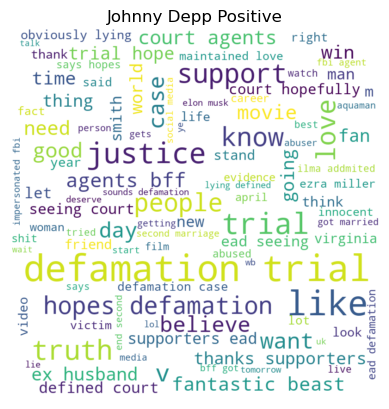

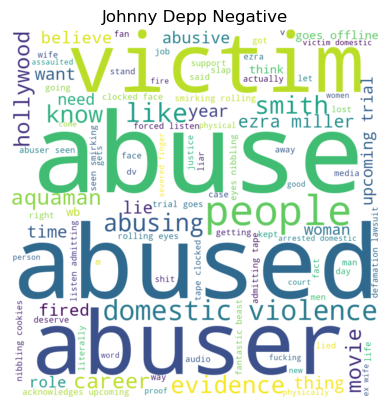

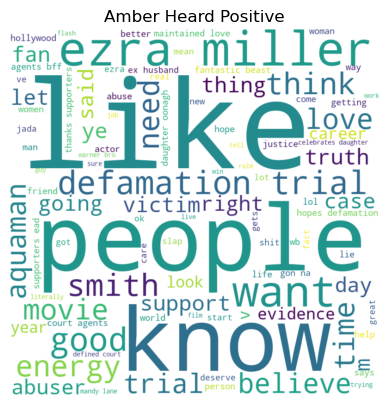

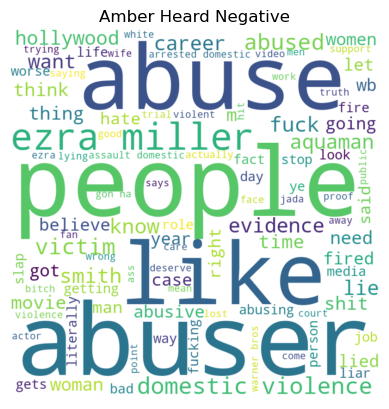

In [5]:
# Create three new DataFrames from the original DataFrame, one for each sentiment category (positive, negative, neutral)
df_jd_pos = df[(df['sentiment_score'] > 0) & (df['Johnny Depp sentiment'] == 'positive')]
df_jd_neg = df[(df['sentiment_score'] < 0) & (df['Johnny Depp sentiment'] == 'negative')]
# df_jd_neu = df[(df['sentiment_score'] == 0) & (df['Johnny Depp sentiment'] == 'neutral')]
df_ah_pos = df[(df['sentiment_score'] > 0) & (df['Amber Heard sentiment'] == 'positive')]
df_ah_neg = df[(df['sentiment_score'] < 0) & (df['Amber Heard sentiment'] == 'negative')]
# df_ah_neu = df[(df['sentiment_score'] == 0) & (df['Amber Heard sentiment'] == 'neutral')]

# Print the number of tweets in each category
print("Number of Johnny Depp positive tweets:", len(df_jd_pos))
print("Number of Johnny Depp negative tweets:", len(df_jd_neg))
# print("Number of Johnny Depp neutral tweets:", len(df_jd_neu))
print("Number of Amber Heard positive tweets:", len(df_ah_pos))
print("Number of Amber Heard negative tweets:", len(df_ah_neg))
# print("Number of Amber Heard neutral tweets:", len(df_ah_neu))

print("")

# Print the number of percentage of tweets in each category
print("Percentage of Johnny Depp positive tweets:", round((len(df_jd_pos)/len(df))*100,2), "%")
print("Percentage of Johnny Depp negative tweets:", round((len(df_jd_neg)/len(df))*100,2),"%")
# print("Number of Johnny Depp neutral tweets:", round((len(df_jd_neu)/len(df))*100,2),"%")
print("Percentage of Amber Heard positive tweets:", round((len(df_ah_pos)/len(df))*100,2),"%")
print("Percentage of Amber Heard negative tweets:", round((len(df_ah_neg)/len(df))*100,2),"%")
# print("Number of Amber Heard neutral tweets:", round((len(df_ah_neu)/len(df))*100,2),"%")

# Generate word clouds for each sentiment category
stopwords_2= set(["n","t","nt","s"])
wordcloud_jd_pos = WordCloud(stopwords =stopwords_2, width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(' '.join(df_jd_pos['tokens'].sum()))
plt.imshow(wordcloud_jd_pos, interpolation='bilinear')
plt.title("Johnny Depp Positive")
plt.axis("off")
plt.show()

wordcloud_jd_neg = WordCloud(stopwords =stopwords_2, width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(' '.join(df_jd_neg['tokens'].sum()))
plt.imshow(wordcloud_jd_neg, interpolation='bilinear')
plt.title("Johnny Depp Negative")
plt.axis("off")
plt.show()

# wordcloud_jd_neu = WordCloud(width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(' '.join(df_jd_neu['tokens'].sum()))
# plt.imshow(wordcloud_jd_neu, interpolation='bilinear')
# plt.title("Johnny Depp Neutral")
# plt.axis("off")
# plt.show()

wordcloud_ah_pos = WordCloud(stopwords =stopwords_2, width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(' '.join(df_ah_pos['tokens'].sum()))
plt.imshow(wordcloud_ah_pos, interpolation='bilinear')
plt.title("Amber Heard Positive")
plt.axis("off")
plt.show()

wordcloud_ah_neg = WordCloud(stopwords =stopwords_2, width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(' '.join(df_ah_neg['tokens'].sum()))
plt.imshow(wordcloud_ah_neg, interpolation='bilinear')
plt.title("Amber Heard Negative")
plt.axis("off")
plt.show()

# wordcloud_ah_neu = WordCloud(width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(' '.join(df_ah_neu['tokens'].sum()))
# plt.imshow(wordcloud_ah_neu, interpolation='bilinear')
# plt.title("Amber Heard Neutral")
# plt.axis("off")
# plt.show()